# Oil Futures

In [59]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [60]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


<AxesSubplot:xlabel='Date'>

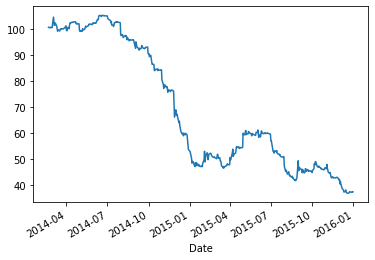

In [61]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

<AxesSubplot:xlabel='Date'>

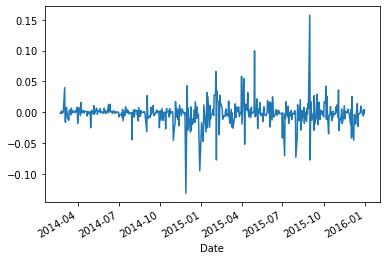

In [62]:
# Create a column of the settle price returns
df["SettledReturns"] = df.Settle.pct_change().dropna()
# settle = df.Settle.pct_change().dropna().to_frame()
df["SettledReturns"].plot()

In [63]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df["Lagged_Return"] = df["SettledReturns"].shift()
df.dropna(inplace=True)

# Prepapre the Features (X) and the Target (y)

In [64]:
# Set the Dependent variable y to the `Return`
y = df.SettledReturns

In [75]:
# Select the `Lagged_Return` and assign the DataFrame to X
x = df.Lagged_Return
x.head()

Date
2014-02-24   -0.001687
2014-02-25    0.001590
2014-02-26   -0.001985
2014-02-27    0.001193
2014-02-28   -0.000199
Name: Lagged_Return, dtype: float64

In [66]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
df["Week_of_year"] = df.index.weekofyear

### Get dummy variables for week and year

In [67]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(df, columns=["Week_of_year"])
X_binary_encoded.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,SettledReturns,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.001687,0.001590,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.001590,-0.001985,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.001985,0.001193,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.001193,-0.000199,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.000199,0.000099,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_binary_encoded.shape

(461, 63)

### Linear Regresion model

In [69]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_binary_encoded, y)

LinearRegression()

In [70]:
# Create predictions using the trained model and the `X_binary_encoded` data
predictions = model.predict(X_binary_encoded)

# List the first 10 predictions
predictions[:10]

array([ 1.59029918e-03, -1.98471767e-03,  1.19319877e-03, -1.98629457e-04,
        9.93344591e-05,  3.98291617e-02, -1.43280160e-02, -1.62806473e-02,
        1.08363708e-03,  7.97087188e-03])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

In [72]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
mse = mean_squared_error(y, predictions)

In [73]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)

In [74]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 1.0
Mean Squared Error (MSE): 7.06576605466061e-29
Root Mean Squared Error (RMSE): 8.405811117709349e-15
Standard Deviation of Futures Return: 0.019325166602824382


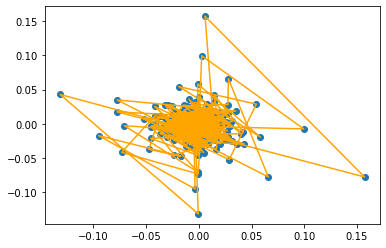

In [80]:
# Plot the model
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, predictions, color="orange")